| S.No. | Attribute                            | Code given         | Unit                | Data type |
|-------|--------------------------------------|--------------------|---------------------|-----------|
| 1     | age                                  | Age                | in years           | Numeric   |
| 2     | sex                                  | Sex                | 1, 0               | Binary    |
| 3     | chest pain type                      | chest pain type    | 1,2,3,4            | Nominal   |
| 4     | resting blood pressure               | resting bp s       | in mm Hg           | Numeric   |
| 5     | serum cholesterol                    | cholesterol        | in mg/dl           | Numeric   |
| 6     | fasting blood sugar                  | fasting blood sugar| 1,0 > 120 mg/dl    | Binary    |
| 7     | resting electrocardiogram results    | resting ecg        | 0,1,2              | Nominal   |
| 8     | maximum heart rate achieved          | max heart rate     | 71–202             | Numeric   |
| 9     | exercise induced angina              | exercise angina    | 0,1                | Binary    |
| 10    | oldpeak = ST                         | oldpeak            | depression         | Numeric   |
| 11    | the slope of the peak exercise ST segment | ST slope       | 0,1,2             | Nominal   |
| 12    | class                                | target             | 0,1                | Binary    |


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
heart_attack = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

In [40]:
print(heart_attack.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None


Manu Siddhartha. (2020). Heart Disease Dataset (Comprehensive). IEEE Dataport. https://dx.doi.org/10.21227/dz4t-cm36

In [41]:
print(heart_attack.head())

   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  


According to the data definition, some columns such as "chest pain type", "resting ecg" and "ST slope" are categorical, but they are represented as integer in the raw dataset. We would like to convert them into the correct data type.


In [42]:
# Define a list of categorical columns
cat_cols = ["chest pain type", "resting ecg", "ST slope"]

# Convert these column into categorical
heart_attack[cat_cols] = heart_attack[cat_cols].astype("object")

In [43]:
# Define a list of binary columns
bool_cols = ["sex", "fasting blood sugar", "exercise angina"]

# Converting non-label binary columns into bool (convienient for rescaling numeric data later on).
heart_attack[bool_cols] = heart_attack[bool_cols].astype("bool")

In [44]:
print("The relative frequency of each class in the target:")
relative_frequency = (heart_attack[['target']].value_counts() * 100 / len(heart_attack)).round(2)
print(relative_frequency)

The relative frequency of each class in the target:
target
1         52.86
0         47.14
Name: count, dtype: float64


### Preprocessing

In [45]:
X = heart_attack.drop(columns = ["target"])
y = heart_attack["target"]

In [46]:
# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('The shape of the training features: ', X_train.shape)
print('The shape of the training target: ', y_train.shape)
print('The shape of the testing features: ', X_test.shape)
print('The shape of the testing target: ', y_test.shape)

The shape of the training features:  (952, 19)
The shape of the training target:  (952,)
The shape of the testing features:  (238, 19)
The shape of the testing target:  (238,)


In [48]:
# Feature scaling
num_cols = X_train.select_dtypes(exclude = ['bool', 'object']).columns
print(num_cols)
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Index(['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak'], dtype='object')


In [49]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [50]:
# Evaluation on training and testing data: accuracy and f1-score
y_pred = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)
print(f"Accuracy score testing data: {accuracy_score(y_test, y_pred):.2f}")
print(f"f1-score score testing data: {f1_score(y_test, y_pred):.2f}")
print(f"Accuracy score training data: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"f1-score score training data: {f1_score(y_train, y_pred_train):.2f}")

Accuracy score testing data: 0.87
f1-score score testing data: 0.88
Accuracy score training data: 0.84
f1-score score training data: 0.85


In [51]:
# Confusuin matrix
print("The confusion matrix for this logistic regression model is: ")
print(confusion_matrix(y_test, y_pred))

The confusion matrix for this logistic regression model is: 
[[ 89  18]
 [ 13 118]]


In [52]:
accuracy_scores = []
f1_scores = []
for i in range(1, X_train.shape[1]+1):
    rfe = RFE(estimator=logreg, n_features_to_select=i)
    rfe.fit(X_train, y_train)
    y_pred = rfe.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

([<matplotlib.axis.XTick at 0x1c0b8dd82d0>,
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16'),
  Text(17.0, 0, '17'),
  Text(18.0, 0, '18'),
  Text(19.0, 0, '19')])

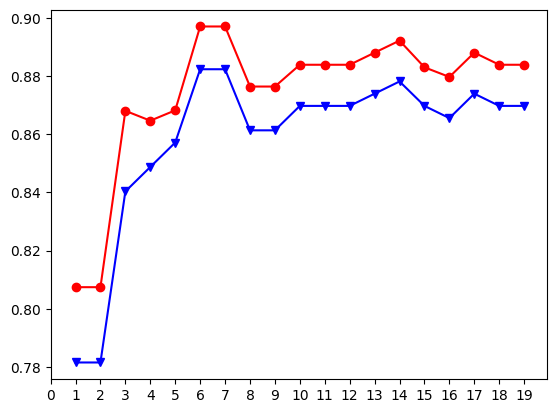

In [53]:
plt.plot(np.arange(1, X_train.shape[1] + 1), f1_scores, label = 'fi_scores', color = 'r', marker = 'o')
plt.plot(np.arange(1, X_train.shape[1] + 1), accuracy_scores, label = 'fi_scores', color = 'b', marker = 'v')
plt.xticks(ticks = np.arange(0, X_train.shape[1] + 1, 1.0))


In [54]:
one_nn = KNeighborsClassifier(n_neighbors = 1)
one_nn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [55]:
y_pred_train = one_nn.predict(X_train)
y_pred = one_nn.predict(X_test)
print(f"Accuracy score testing data: {accuracy_score(y_test, y_pred):.2f}")
print(f"f1-score score testing data: {f1_score(y_test, y_pred):.2f}")
print(f"Accuracy score training data: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"f1-score score training data: {f1_score(y_train, y_pred_train):.2f}")

Accuracy score testing data: 0.88
f1-score score testing data: 0.89
Accuracy score training data: 1.00
f1-score score training data: 1.00


In [56]:
# Step 4: Define the parameter grid
param_grid = {
    'n_neighbors': np.arange(1, 21).tolist(),
}

# Step 5: Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring='accuracy',  # Metric to optimize
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,         # Use all CPUs
    return_train_score=True  # Ensures train scores are available
)

# Step 6: Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Step 7: Best hyperparameters and performance
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Step 8: Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best parameters: {'n_neighbors': 1}
Best cross-validation accuracy: 0.8676550013777898


In [57]:
mean_test_score = grid_search.cv_results_['mean_test_score']
mean_train_score = grid_search.cv_results_['mean_train_score']
print(mean_test_score)
print(mean_train_score)

[0.867655   0.80774869 0.82773216 0.82664646 0.83295123 0.84031965
 0.8402976  0.83399284 0.8413337  0.83923395 0.84870212 0.847655
 0.84554974 0.84346101 0.83925599 0.83924497 0.8329402  0.83188206
 0.8360981  0.83923946]
[1.         0.93487572 0.91596463 0.8878665  0.88655554 0.88261508
 0.87316144 0.87289759 0.87053297 0.86921788 0.870007   0.86738026
 0.86527983 0.86134007 0.85740237 0.85845086 0.85556544 0.85372679
 0.85451281 0.84952387]


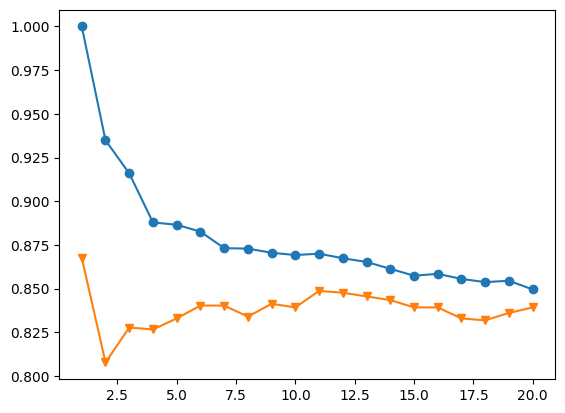

In [58]:
plt.plot(np.arange(1,21), mean_train_score, marker = 'o')
plt.plot(np.arange(1, 21), mean_test_score, marker = 'v')

In [59]:
dc_clf = DecisionTreeClassifier(random_state=42)
dc_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
y_pred_train = dc_clf.predict(X_train)
y_pred = dc_clf.predict(X_test)
print(f"Accuracy score testing data: {accuracy_score(y_test, y_pred):.2f}")
print(f"f1-score score testing data: {f1_score(y_test, y_pred):.2f}")
print(f"Accuracy score training data: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"f1-score score training data: {f1_score(y_train, y_pred_train):.2f}")

Accuracy score testing data: 0.90
f1-score score testing data: 0.91
Accuracy score training data: 1.00
f1-score score training data: 1.00


In [61]:
param_max_depth = {'max_depth': np.arange(1, 15, 1).tolist()}
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_max_depth,
    scoring='accuracy',       # Metric to optimize (e.g., 'accuracy', 'f1')
    cv=5,                   # Number of cross-validation folds             
    n_jobs=-1               # Number of parallel jobs (-1 uses all CPUs)
)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

Best parameters: {'max_depth': 11}
Best cross-validation accuracy: 0.86


In [62]:
dc_clf = DecisionTreeClassifier(random_state = 42, max_depth = 11)
dc_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, random_state=42)

In [63]:
y_pred_train = dc_clf.predict(X_train)
y_pred = dc_clf.predict(X_test)
print(f"Accuracy score testing data: {accuracy_score(y_test, y_pred):.2f}")
print(f"f1-score score testing data: {f1_score(y_test, y_pred):.2f}")
print(f"Accuracy score training data: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"f1-score score training data: {f1_score(y_train, y_pred_train):.2f}")

Accuracy score testing data: 0.88
f1-score score testing data: 0.89
Accuracy score training data: 0.99
f1-score score training data: 0.99


In [64]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
y_pred_train = rf_clf.predict(X_train)
y_pred = rf_clf.predict(X_test)
print(f"Accuracy score testing data: {accuracy_score(y_test, y_pred):.2f}")
print(f"f1-score score testing data: {f1_score(y_test, y_pred):.2f}")
print(f"Accuracy score training data: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"f1-score score training data: {f1_score(y_train, y_pred_train):.2f}")

Accuracy score testing data: 0.95
f1-score score testing data: 0.96
Accuracy score training data: 1.00
f1-score score training data: 1.00


In [66]:
# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier


In [67]:
ada = AdaBoostClassifier(estimator = dc_clf, n_estimators = 200, random_state = 42)
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=11,
                                                    random_state=42),
                   n_estimators=200, random_state=42)

In [68]:
y_pred_train = ada.predict(X_train)
y_pred = ada.predict(X_test)
print(f"Accuracy score testing data: {accuracy_score(y_test, y_pred):.2f}")
print(f"f1-score score testing data: {f1_score(y_test, y_pred):.2f}")
print(f"Accuracy score training data: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"f1-score score training data: {f1_score(y_train, y_pred_train):.2f}")

Accuracy score testing data: 0.95
f1-score score testing data: 0.95
Accuracy score training data: 1.00
f1-score score training data: 1.00


In [ ]:
import pickle
with open('heartattack.pkl', 'wb') as f:
  pickle.dump(ada, f)